✅ Device: cuda

🧠 Training for 4 epochs...

Epoch [1/4] - Loss: 0.3128 - Time: 4.89 min
Epoch [2/4] - Loss: 0.0837 - Time: 4.87 min
Epoch [3/4] - Loss: 0.0532 - Time: 4.88 min
Epoch [4/4] - Loss: 0.0357 - Time: 4.87 min

✅ Training Done (4 epochs). Evaluating now...


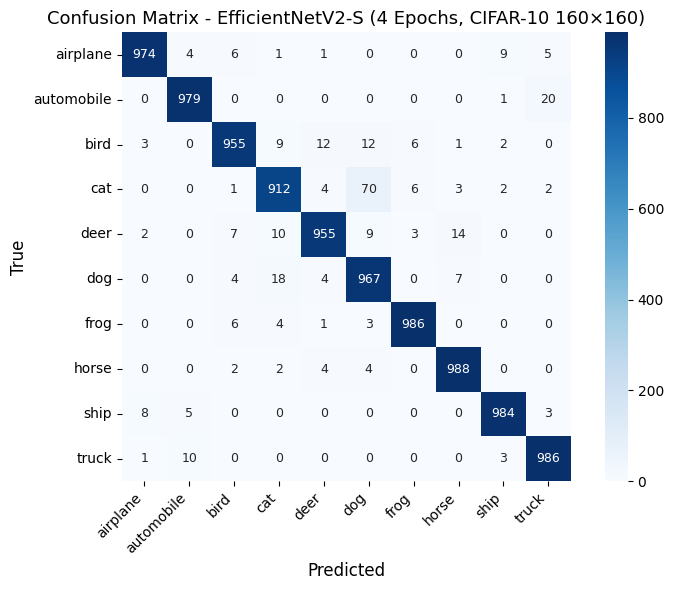

In [ ]:
# ===============================================================
# CONFUSION MATRIX FOR EFFICIENTNETV2-S
# CIFAR-10 (160×160) 
# ===============================================================

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

# ----------------------------
# 1. Setup
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Device: {device}")

classes = ['airplane','automobile','bird','cat','deer',
           'dog','frog','horse','ship','truck']

# ----------------------------
# 2. Transform & Load CIFAR-10
# ----------------------------
transform_train = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

transform_test = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# ----------------------------
# 3. Load EfficientNetV2-S Model
# ----------------------------
model = models.efficientnet_v2_s(weights='IMAGENET1K_V1')
in_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(in_features, 10)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ----------------------------
# 4. Train 
# ----------------------------
epochs = 4
print("\n🧠 Training for 4 epochs...\n")
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    start = time.time()

    for imgs, labels in trainloader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {running_loss/len(trainloader):.4f} - Time: {(time.time()-start)/60:.2f} min")

print("\n✅ Training Done (4 epochs). Evaluating now...")

# ----------------------------
# 5. Evaluate and Build Confusion Matrix
# ----------------------------
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for imgs, labels in testloader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# ----------------------------
# 6. Display Confusion Matrix (Raw Counts)
# ----------------------------
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes,
            cbar=True, square=True,
            annot_kws={"size":9})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12)
plt.title("Confusion Matrix - EfficientNetV2-S (4 Epochs, CIFAR-10 160×160)", fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


✅ Device: cuda
Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth


100%|██████████| 8.79M/8.79M [00:00<00:00, 67.0MB/s]


🧠 Training ShuffleNetV2 for 4 epochs...



Epoch [1/4] - Loss: 0.9899 - Time: 1.12 min
Epoch [2/4] - Loss: 0.3086 - Time: 1.10 min
Epoch [3/4] - Loss: 0.2213 - Time: 1.10 min
Epoch [4/4] - Loss: 0.1715 - Time: 1.10 min

✅ Training Done (4 epochs). Evaluating now...


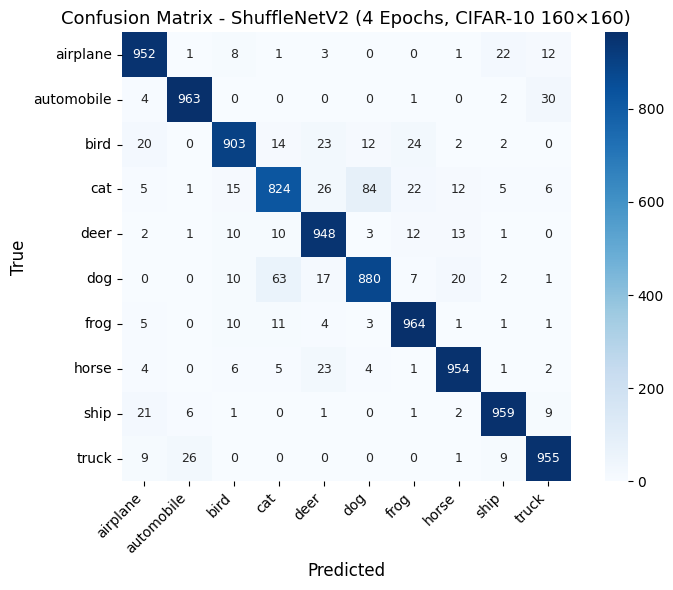

In [ ]:
# ===============================================================
# CONFUSION MATRIX FOR SHUFFLENETV2 
# CIFAR-10 (160×160) 
# ===============================================================

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

# ----------------------------
# 1. Setup
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Device: {device}")

classes = ['airplane','automobile','bird','cat','deer',
           'dog','frog','horse','ship','truck']

# ----------------------------
# 2. Transform & Load CIFAR-10
# ----------------------------
transform_train = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

transform_test = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# ----------------------------
# 3. Load ShuffleNetV2 Model
# ----------------------------
# Using the 1.0x version (balanced accuracy and efficiency)
model = models.shufflenet_v2_x1_0(weights='IMAGENET1K_V1')

# Replace classifier for CIFAR-10
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, 10)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ----------------------------
# 4. Train 
# ----------------------------
epochs = 4
print("\n🧠 Training ShuffleNetV2 for 4 epochs...\n")

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    start = time.time()

    for imgs, labels in trainloader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {running_loss/len(trainloader):.4f} - Time: {(time.time()-start)/60:.2f} min")

print("\n✅ Training Done (4 epochs). Evaluating now...")

# ----------------------------
# 5. Evaluate and Build Confusion Matrix
# ----------------------------
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for imgs, labels in testloader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# ----------------------------
# 6. Display Confusion Matrix (Raw Counts)
# ----------------------------
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes,
            cbar=True, square=True,
            annot_kws={"size":9})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12)
plt.title("Confusion Matrix - ShuffleNetV2 (4 Epochs, CIFAR-10 160×160)", fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


✅ Device: cuda
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth


100%|██████████| 21.1M/21.1M [00:00<00:00, 90.8MB/s]


🧠 Training for 4 epochs...



Epoch [1/4] - Loss: 0.3958 - Time: 1.36 min
Epoch [2/4] - Loss: 0.1407 - Time: 1.36 min
Epoch [3/4] - Loss: 0.0838 - Time: 1.35 min
Epoch [4/4] - Loss: 0.0544 - Time: 1.36 min

✅ Training Done (4 epochs). Evaluating now...


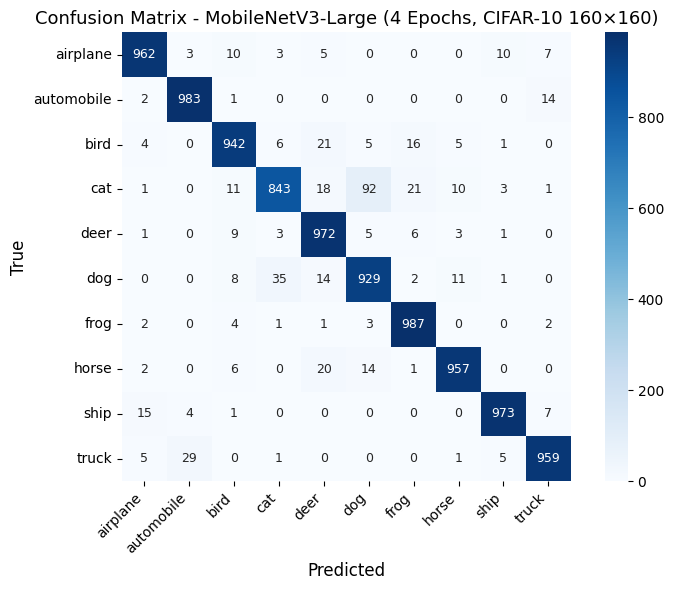

In [ ]:
# ===============================================================
# CONFUSION MATRIX FOR MOBILENETV3-LARGE 
# CIFAR-10 (160×160) 
# ===============================================================

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

# ----------------------------
# 1. Setup
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Device: {device}")

classes = ['airplane','automobile','bird','cat','deer',
           'dog','frog','horse','ship','truck']

# ----------------------------
# 2. Transform & Load CIFAR-10
# ----------------------------
transform_train = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

transform_test = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# ----------------------------
# 3. Load MobileNetV3
# ----------------------------
model = models.mobilenet_v3_large(weights='IMAGENET1K_V1')
in_features = model.classifier[3].in_features
model.classifier[3] = nn.Linear(in_features, 10)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ----------------------------
# 4. Train 
# ----------------------------
epochs = 4
print("\n🧠 Training for 4 epochs...\n")
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    start = time.time()

    for imgs, labels in trainloader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {running_loss/len(trainloader):.4f} - Time: {(time.time()-start)/60:.2f} min")

print("\n✅ Training Done (4 epochs). Evaluating now...")

# ----------------------------
# 5. Evaluate and Build Confusion Matrix
# ----------------------------
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for imgs, labels in testloader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# ----------------------------
# 6. Display Confusion Matrix (Raw Counts)
# ----------------------------
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes,
            cbar=True, square=True,
            annot_kws={"size":9})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12)
plt.title("Confusion Matrix - MobileNetV3-Large (4 Epochs, CIFAR-10 160×160)", fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


✅ Device: cuda


100%|██████████| 170M/170M [00:04<00:00, 40.0MB/s]


Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth


100%|██████████| 82.7M/82.7M [00:00<00:00, 209MB/s]


Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth


100%|██████████| 8.79M/8.79M [00:00<00:00, 106MB/s]


Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth


100%|██████████| 21.1M/21.1M [00:00<00:00, 155MB/s]



🧠 Training Ensemble MESNet for 4 epochs...

Epoch [1/4] - Loss: 0.3073 - Time: 6.65 min
Epoch [2/4] - Loss: 0.0807 - Time: 6.71 min
Epoch [3/4] - Loss: 0.0452 - Time: 6.71 min
Epoch [4/4] - Loss: 0.0328 - Time: 6.72 min

✅ Training Done (4 epochs). Evaluating now...


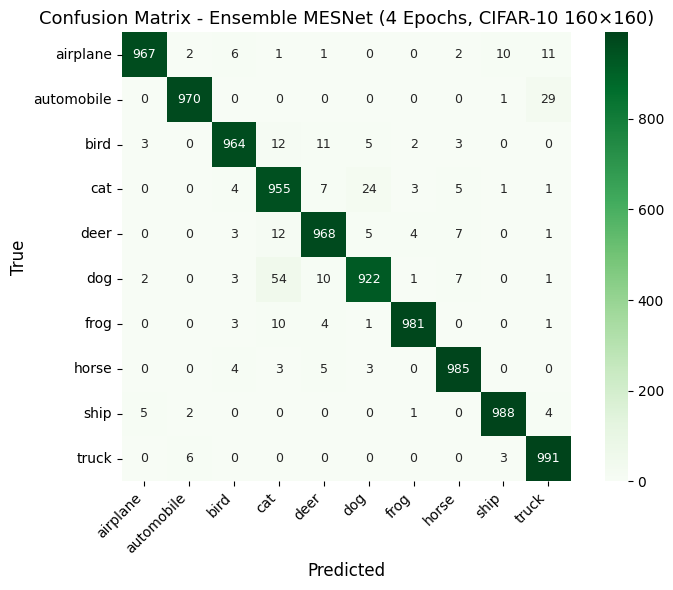

In [1]:
# ===============================================================
# CONFUSION MATRIX FOR ENSEMBLE MESNET 
# Combines: EfficientNetV2-S + ShuffleNetV2 + MobileNetV3
# CIFAR-10 (160×160) 
# ===============================================================

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

# ----------------------------
# 1. Setup
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Device: {device}")

classes = ['airplane','automobile','bird','cat','deer',
           'dog','frog','horse','ship','truck']

# ----------------------------
# 2. Transform & Load CIFAR-10
# ----------------------------
transform_train = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

transform_test = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# ----------------------------
# 3. Load Models
# ----------------------------
# EfficientNetV2-S
eff = models.efficientnet_v2_s(weights='IMAGENET1K_V1')
eff.classifier[1] = nn.Linear(eff.classifier[1].in_features, 10)
eff = eff.to(device)

# ShuffleNetV2
shuff = models.shufflenet_v2_x1_0(weights='IMAGENET1K_V1')
shuff.fc = nn.Linear(shuff.fc.in_features, 10)
shuff = shuff.to(device)

# MobileNetV3-Large
mob = models.mobilenet_v3_large(weights='IMAGENET1K_V1')
mob.classifier[3] = nn.Linear(mob.classifier[3].in_features, 10)
mob = mob.to(device)

# ----------------------------
# 4. Ensemble MESNet Definition
# ----------------------------
class MESNet(nn.Module):
    def __init__(self, m1, m2, m3):
        super(MESNet, self).__init__()
        self.m1 = m1
        self.m2 = m2
        self.m3 = m3

    def forward(self, x):
        y1 = self.m1(x)
        y2 = self.m2(x)
        y3 = self.m3(x)
        # Average voting ensemble
        y = (y1 + y2 + y3) / 3
        return y

model = MESNet(eff, shuff, mob).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ----------------------------
# 5. Train 
# ----------------------------
epochs = 4
print("\n🧠 Training Ensemble MESNet for 4 epochs...\n")
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    start = time.time()

    for imgs, labels in trainloader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {running_loss/len(trainloader):.4f} - Time: {(time.time()-start)/60:.2f} min")

print("\n✅ Training Done (4 epochs). Evaluating now...")

# ----------------------------
# 6. Evaluate and Confusion Matrix
# ----------------------------
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for imgs, labels in testloader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)

# ----------------------------
# 7. Display Confusion Matrix
# ----------------------------
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=classes, yticklabels=classes,
            cbar=True, square=True, annot_kws={"size":9})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12)
plt.title("Confusion Matrix - Ensemble MESNet (4 Epochs, CIFAR-10 160×160)", fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()